# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
#from sklearn.datasets import load_boston
#from sklearn import model_selection
#boston = load_boston()
#x_train, x_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size=0.25,   random_state=42)

Start of Homework


In [4]:
(X_train, y_train_labels), (X_test, y_test_labels) = tf.keras.datasets.boston_housing.load_data(
    test_split=0.20, seed=100
)

57344/57026 [==============================] - 0s 0us/step


In [5]:
# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train = (X_train - train_mean) / train_std

In [6]:
print(X_train.shape) # 
print(X_test.shape)  # 

(404, 13)
(102, 13)


In [7]:
import matplotlib.pyplot as plt

In [9]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [10]:
from keras.callbacks import ModelCheckpoint
## relu relu
model0 = Sequential([
    Dense(20, activation='relu', input_shape=[len(X_train[0])]),
    #Dense(10, activation='linear'),
    Dense(1,activation='relu')
])
model_checkpoint = ModelCheckpoint(filepath='model_best_{epoch}_{val_loss:.2f}',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
model0.compile(optimizer='adam',
              loss='mse',
              metrics=[coeff_determination])

model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
history0 = model0.fit(X_train, y_train_labels,
                    epochs=1000,
                    batch_size=101,
                    validation_data=(X_test, y_test_labels))
                    #callbacks=[model_checkpoint])

Epoch 1/1000
4/4 [==============================] - 3s 56ms/step - loss: 591.5793 - coeff_determination: -6.0418 - val_loss: 3956.9412 - val_coeff_determination: -19347238912.0000
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 589.2661 - coeff_determination: -6.7694 - val_loss: 5259.7695 - val_coeff_determination: -24000129024.0000
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 596.8153 - coeff_determination: -6.4373 - val_loss: 6682.9946 - val_coeff_determination: -28990916608.0000
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 585.9002 - coeff_determination: -6.0138 - val_loss: 8150.7671 - val_coeff_determination: -34106425344.0000
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 577.4954 - coeff_determination: -6.2703 - val_loss: 9681.8535 - val_coeff_determination: -39251841024.0000
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 560.9941 - coeff_determinat

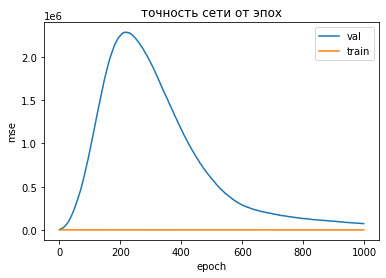

In [13]:
plt.plot(history0.history['val_loss'], label='val')
plt.plot(history0.history['loss'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('точность сети от эпох')
plt.show()

MSE val 73100, r2 = 0.897

In [14]:
# sigmoid-relu

model = Sequential([
    Dense(20, activation='sigmoid', input_shape=[len(X_train[0])]),
    #Dense(10, activation='linear'),
    Dense(1,activation='relu')
])
model_checkpoint = ModelCheckpoint(filepath='model_best_{epoch}_{val_loss:.2f}',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
model.compile(optimizer='adam',
              loss='mse',
              metrics=[coeff_determination])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train_labels,
                    epochs=1400,
                    batch_size=101,
                    validation_data=(X_test, y_test_labels))
                    #callbacks=[model_checkpoint])

Epoch 1/1400
4/4 [==============================] - 0s 45ms/step - loss: 595.9817 - coeff_determination: -5.9295 - val_loss: 576.1194 - val_coeff_determination: -1273993088.0000
Epoch 2/1400
4/4 [==============================] - 0s 15ms/step - loss: 587.3243 - coeff_determination: -5.9842 - val_loss: 573.5627 - val_coeff_determination: -1263977472.0000
Epoch 3/1400
4/4 [==============================] - 0s 12ms/step - loss: 560.2488 - coeff_determination: -6.6410 - val_loss: 570.7899 - val_coeff_determination: -1253983104.0000
Epoch 4/1400
4/4 [==============================] - 0s 11ms/step - loss: 566.3749 - coeff_determination: -6.8317 - val_loss: 567.6743 - val_coeff_determination: -1243837440.0000
Epoch 5/1400
4/4 [==============================] - 0s 11ms/step - loss: 594.9081 - coeff_determination: -6.0294 - val_loss: 564.5413 - val_coeff_determination: -1233481856.0000
Epoch 6/1400
4/4 [==============================] - 0s 11ms/step - loss: 615.5274 - coeff_determination: -6.28

MSE val 77.5, r2 train 0.8437
Не смог настроить r2 val

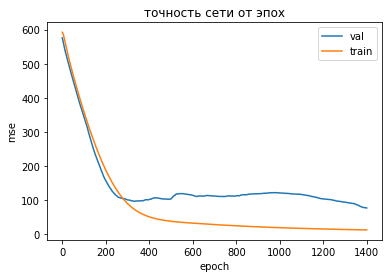

In [16]:
plt.plot(history.history['val_loss'], label='val')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('точность сети от эпох')
plt.show()

In [17]:
# sigmoid - linear - relu
model3 = Sequential([
    Dense(20, activation='sigmoid', input_shape=[len(X_train[0])]),
    Dense(10, activation='linear'),
    Dense(1,activation='relu')
])
model_checkpoint = ModelCheckpoint(filepath='model_best_{epoch}_{val_loss:.2f}',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
model3.compile(optimizer='adam',
              loss='mse',
              metrics=[coeff_determination])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [18]:
history3 = model3.fit(X_train, y_train_labels,
                    epochs=1000,
                    batch_size=101,
                    validation_data=(X_test, y_test_labels))

Epoch 1/1000
4/4 [==============================] - 0s 49ms/step - loss: 573.9186 - coeff_determination: -5.6877 - val_loss: 564.6893 - val_coeff_determination: -1361250048.0000
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 563.1203 - coeff_determination: -5.5003 - val_loss: 561.5564 - val_coeff_determination: -1361250048.0000
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 526.6789 - coeff_determination: -5.6280 - val_loss: 558.0232 - val_coeff_determination: -1361250048.0000
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 520.0423 - coeff_determination: -5.6883 - val_loss: 552.8317 - val_coeff_determination: -1361250048.0000
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 486.8182 - coeff_determination: -5.8032 - val_loss: 547.3058 - val_coeff_determination: -1361250048.0000
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 522.6781 - coeff_determination: -5.03

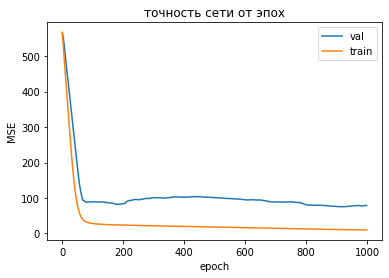

In [19]:
plt.plot(history3.history['val_loss'], label='val')
plt.plot(history3.history['loss'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('точность сети от эпох')
plt.show()

MSE 78.93 , r2 train = 0.881
После 200 эпохи начинает переобучаться

Model sigmoid-relu дала наилучшие результаты

Из-за маленького значения batch_size обучение занимает очень много времени, попробуем увеличить его до 2000.

На данный момент наша модель отвечает линейно:

In [24]:
model.predict(X_test[:20])

array([[19.465235],
       [19.465235],
       [19.465235],
       [21.540514],
       [21.51473 ],
       [19.465235],
       [15.66728 ],
       [15.439413],
       [19.465235],
       [17.170456],
       [19.465235],
       [19.465235],
       [15.439413],
       [21.369959],
       [17.17045 ],
       [17.461546],
       [21.328535],
       [15.200347],
       [19.465235],
       [19.465235]], dtype=float32)

In [26]:
model3.predict(X_test[:20])

array([[27.074587],
       [28.607159],
       [27.074963],
       [27.073446],
       [36.857525],
       [27.117136],
       [24.328196],
       [24.328196],
       [27.20041 ],
       [24.760813],
       [27.073606],
       [27.095907],
       [24.328196],
       [27.074621],
       [24.328196],
       [24.328196],
       [33.883377],
       [24.328196],
       [27.787626],
       [29.545778]], dtype=float32)

## Домашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

    

## Набор данных для курсового проекта

https://www.notion.so/21f239a4d05e4cbf84a71c869668ecd3